# Naive Bayes Classification - Airline Tweets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/airline_tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


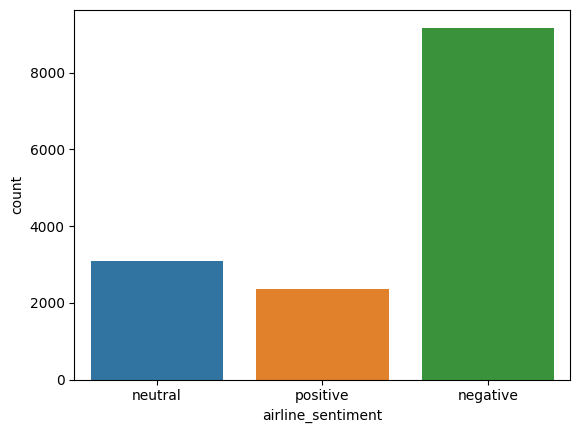

In [6]:
sns.countplot(data = df, x='airline_sentiment', hue = 'airline_sentiment')
plt.show()

In [7]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

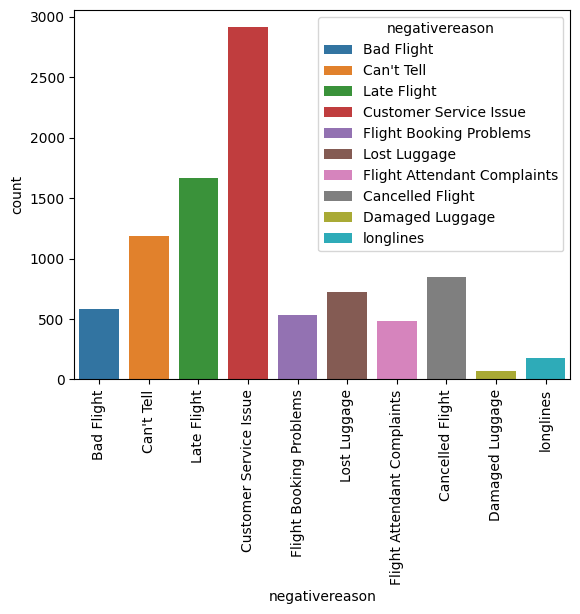

In [8]:
sns.countplot(data=df, x='negativereason', hue ='negativereason')
plt.xticks(rotation=90)
plt.show()

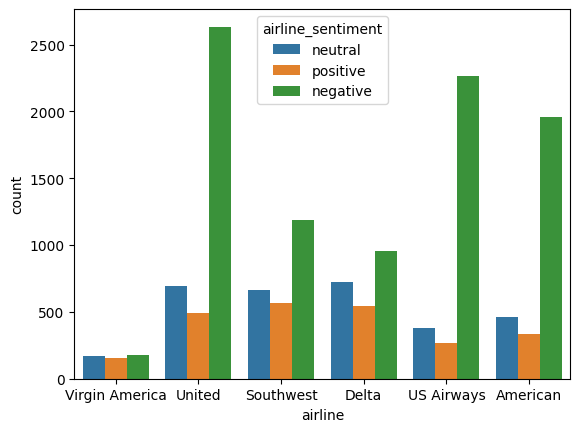

In [9]:
sns.countplot(data=df, x='airline', hue = 'airline_sentiment')
plt.show()

In [10]:
data = df[['airline_sentiment', 'text']]

In [11]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [12]:
X = data['text']
y = data ['airline_sentiment']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf = TfidfVectorizer(stop_words='english')

In [18]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [19]:
X_train_tfidf = tfidf.transform(X_train)

In [20]:
X_test_tfidf = tfidf.transform(X_test)

In [21]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 107073 stored elements and shape (11712, 12971)>

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [25]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [29]:
from sklearn.svm import SVC, LinearSVC

In [30]:
rbf_svc = SVC()
rbf_svc.fit(X_train_tfidf, y_train)

SVC()

In [32]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
def report(model):
    pred = model.predict(X_test_tfidf)
    print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))

In [38]:
report(nb)

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928

[[1807    9    1]
 [ 524   97    7]
 [ 399   17   67]]


In [39]:
report(lr)

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.81      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928

[[1695  101   21]
 [ 292  293   43]
 [ 133   71  279]]


In [40]:
report(rbf_svc)

              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      1817
     neutral       0.67      0.41      0.51       628
    positive       0.81      0.56      0.66       483

    accuracy                           0.77      2928
   macro avg       0.75      0.64      0.67      2928
weighted avg       0.76      0.77      0.75      2928

[[1721   73   23]
 [ 330  256   42]
 [ 156   55  272]]


In [41]:
report(linear_svc)

              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928

[[1624  158   35]
 [ 240  327   61]
 [ 106   69  308]]


In [42]:
from sklearn.pipeline import Pipeline

In [44]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('svc', LinearSVC())])

In [45]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [50]:
pipe.predict(['the flight was aweful'])

array(['negative'], dtype=object)

In [51]:
tfidf.vocabulary_

{'united': 12022,
 'hi': 6014,
 'relative': 9648,
 'flight': 5168,
 'booking': 2645,
 'problems': 9187,
 'number': 8319,
 'my8yb4': 7968,
 'clarita': 3269,
 'jaramillo': 6689,
 'mejia': 7657,
 'thank': 11341,
 'americanair': 1889,
 'served': 10313,
 'nastiest': 8035,
 'food': 5293,
 'ive': 6645,
 'seen': 10262,
 'yesterday': 12872,
 'rubber': 10005,
 'chicken': 3192,
 'slime': 10566,
 'entire': 4690,
 'cabin': 2900,
 'sent': 10294,
 'fas': 4986,
 'confirm': 3525,
 'yes': 12869,
 'partly': 8684,
 'used': 12189,
 'del': 4000,
 'ewr': 4799,
 'return': 9835,
 'cancelled': 2947,
 'flightled': 5197,
 'technical': 11273,
 'glitch': 5630,
 'operations': 8479,
 'jetblue': 6725,
 'helping': 5989,
 'bunch': 2828,
 'trying': 11717,
 'time': 11472,
 'fly': 5239,
 'terrible': 11311,
 'service': 10316,
 'ruined': 10013,
 'vacation': 12231,
 'lostsuitcase': 7341,
 'noreimbursement': 8246,
 'usairways': 12170,
 '2hrs': 593,
 'late': 7048,
 'flightr': 5205,
 'finally': 5096,
 'taking': 11213,
 'new': 81